## Mini Project 2

In [4]:
# Import your Library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [5]:
# read the dataset
sns.set(style="white",color_codes=True)


In [106]:
# check the dimensinality of the dataframe by printing the shape of the dataframe
data = pd.read_csv("telecom_churn.csv")


In [9]:
# check the head of the dataset
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [10]:
# check the information of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [12]:
# check the descriptive statistics of the dataset
descriptive_stats = data.describe()
print(descriptive_stats)

       Account length    Area code  Number vmail messages  Total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.25943

In [18]:
# change the data type of the churn column from boolean to int64 and check the dataframe again
data['Churn'] = data['Churn'].astype('int64')


In [21]:
# checking the dataframe again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [25]:
# get the distribution of the churn by counting how many churned and how many did not
churn_distribution = data['Churn'].value_counts()
churn_distribution

Churn
0    2850
1     483
Name: count, dtype: int64

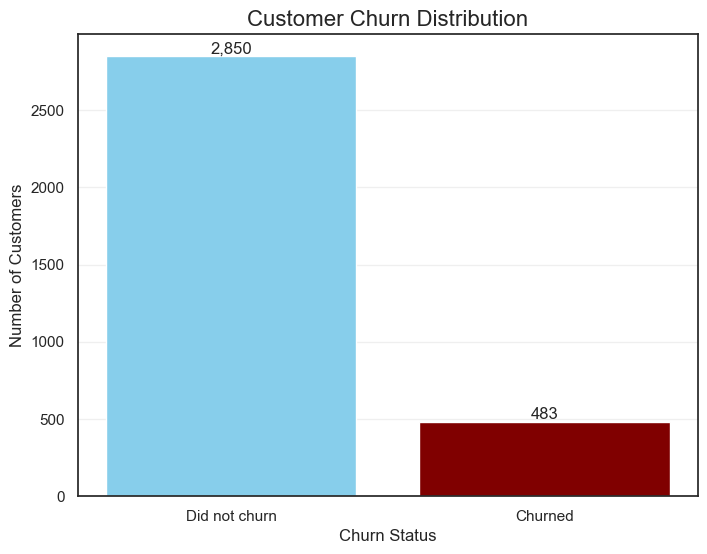

In [31]:
# plot the count from the result above
# Creating the plot

plt.figure(figsize=(8, 6))
bars = plt.bar(churn_distribution.index.astype(str), churn_distribution.values, color=['skyblue', 'maroon'])

# Adding counts on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,}',
             ha='center', va='bottom')

# Customizing the plot
plt.title('Customer Churn Distribution', fontsize=16)
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks([0, 1], ['Did not churn', 'Churned'])
plt.grid(axis='y', alpha=0.3)

# Showing the plot 
plt.show()

In [33]:
# what is the proportion of churned users in the dataframe
churn_proportion = data['Churn'].value_counts(normalize=True)[1]
print(f"Proportion of churned users: {churn_proportion:.2%}")

Proportion of churned users: 14.49%


In [37]:
# give the values of the first five rows in the first three columns
print("First five rows of first three columns:")
data.iloc[:5, :3]


First five rows of first three columns:


,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


In [38]:
# give the values of the first five rows in the first three columns
print("First five rows of first three columns:")
data.iloc[:5, :3]


First five rows of first three columns:


,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


In [45]:
# select all the states that starts with W

State_that_starts_with_W = data[data['State'].str.startswith('W')]

print("States starting with 'W':")
State_that_starts_with_W


States starting with 'W':


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
26,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
44,WI,64,510,No,No,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
49,WY,97,415,No,Yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3278,WI,87,415,No,No,0,238.0,97,40.46,164.5,97,13.98,282.5,132,12.71,10.6,6,2.86,2,0
3303,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,0
3319,WY,89,415,No,No,0,115.4,99,19.62,209.9,115,17.84,280.9,112,12.64,15.9,6,4.29,3,0
3324,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,0


In [46]:
# using the map function, replace Yes and No in the International plan column to True and False
data['International plan'] = data['International plan'].map({'Yes': True, 'No': False})


In [51]:
data.head(2)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0


In [62]:
# we want to understand the total calls that have been made by customers. Total_calls is calculated as
# the sum of Total dat calls, Total eve calls, Total night calls, Total intl calls.

data['Total calls'] = (data['Total day calls'] + data['Total eve calls'] + 
                     data['Total night calls'] + data['Total intl calls'])

# Showing results
print("Customer Call Summary:")
(data[['Total day calls', 'Total eve calls', 
          'Total night calls', 'Total intl calls', 'Total calls']])




Customer Call Summary:


,Total day calls,Total eve calls,Total night calls,Total intl calls,Total calls
0,110,99,91,3,303
1,123,103,103,3,332
2,114,110,104,5,333
3,71,88,89,7,255
4,113,122,121,3,359
...,...,...,...,...,...
3328,77,126,83,6,292
3329,57,55,123,4,239
3330,109,58,91,6,264
3331,105,84,137,10,336


<Axes: xlabel='Total calls', ylabel='Count'>

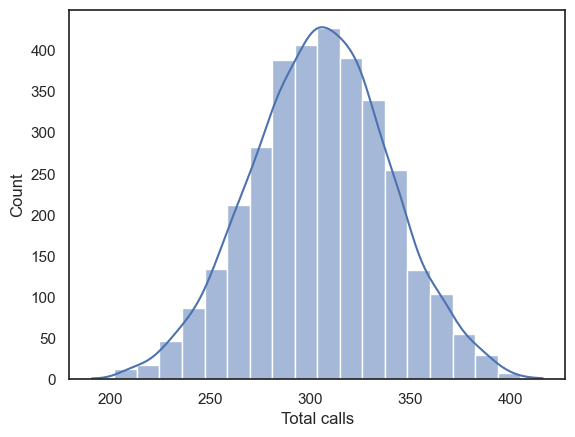

In [70]:
# seaborn
# Visualization of total calls distribution

sns.histplot(data=data, x='Total calls', bins=20, kde=True)

In [79]:
data.head(2)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.7,1,0,303
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.7,1,0,332


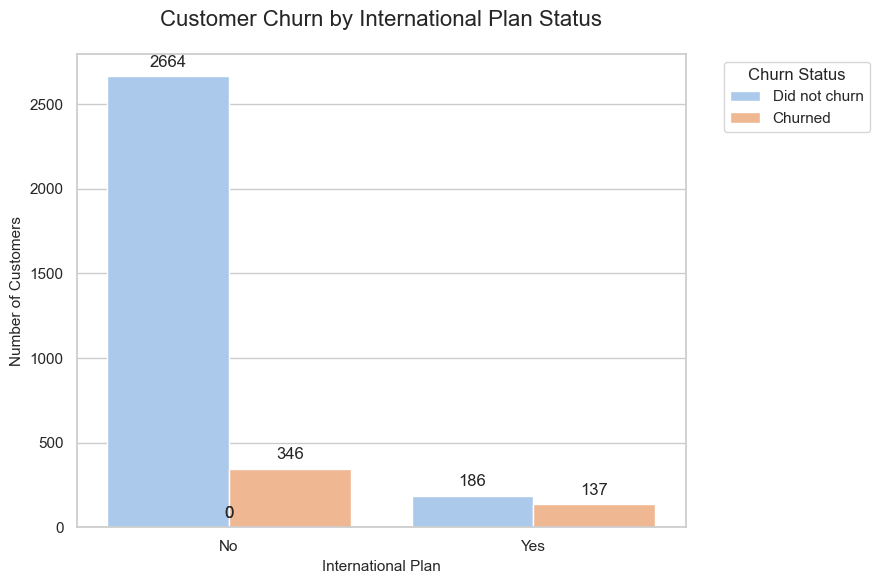

In [107]:
# create a count plot to understand the churn of the international plan

# Setting the style and palette
sns.set(style="whitegrid", palette="pastel")

# Creating the count plot
plt.figure(figsize=(9, 6))
ax = sns.countplot(data=data, x='International plan', hue='Churn', 
                  order=['No', 'Yes'],
                  hue_order=[0, 1])

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

# Customizing the plot
plt.title('Customer Churn by International Plan Status', fontsize=16, pad=20)
plt.xlabel('International Plan', fontsize=11)
plt.ylabel('Number of Customers', fontsize=11)
plt.legend(title='Churn Status', labels=['Did not churn', 'Churned'], 
           bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and show
plt.tight_layout()
plt.show()

In [98]:
# Assuming your dataframe is named 'df' and the column containing the international plan information is named 'international_plan'

# First, rename the column
data = data.rename(columns={'International plan': 'Internatioal_plan'})

In [100]:
data.head(2)

,State,Account length,Area code,Internatioal_plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.7,1,0,303
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.7,1,0,332
